In [7]:
# %matplotlib notebook
%matplotlib inline

In [8]:
import numpy as np
from tqdm.notebook import tqdm
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import cv2

import utils

In [9]:
BLACK = 0
WHITE = 255

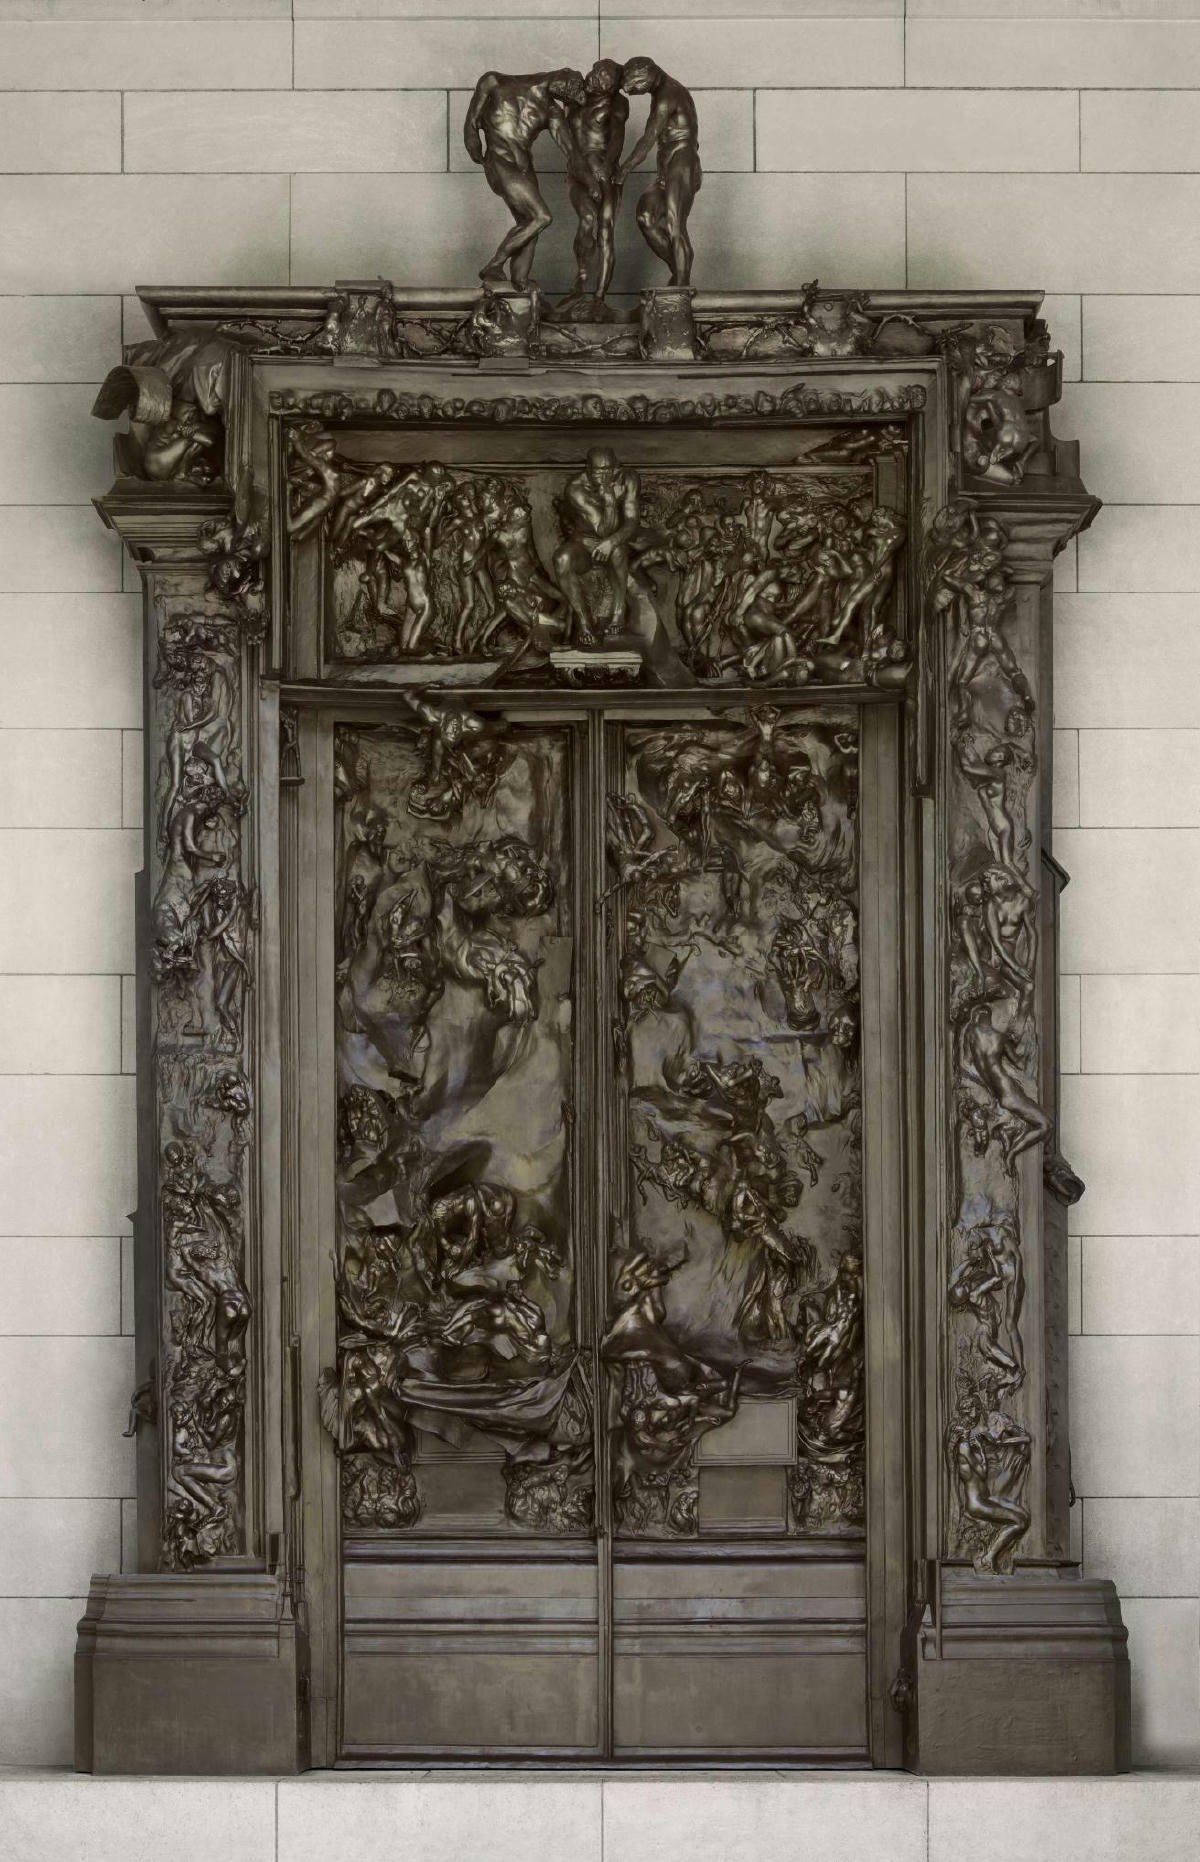

In [10]:
# only use cv2 in this cell
original = cv2.imread("data/gates_of_hell.jpeg")
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)  # converge BGR to RGB array
utils.display(original)

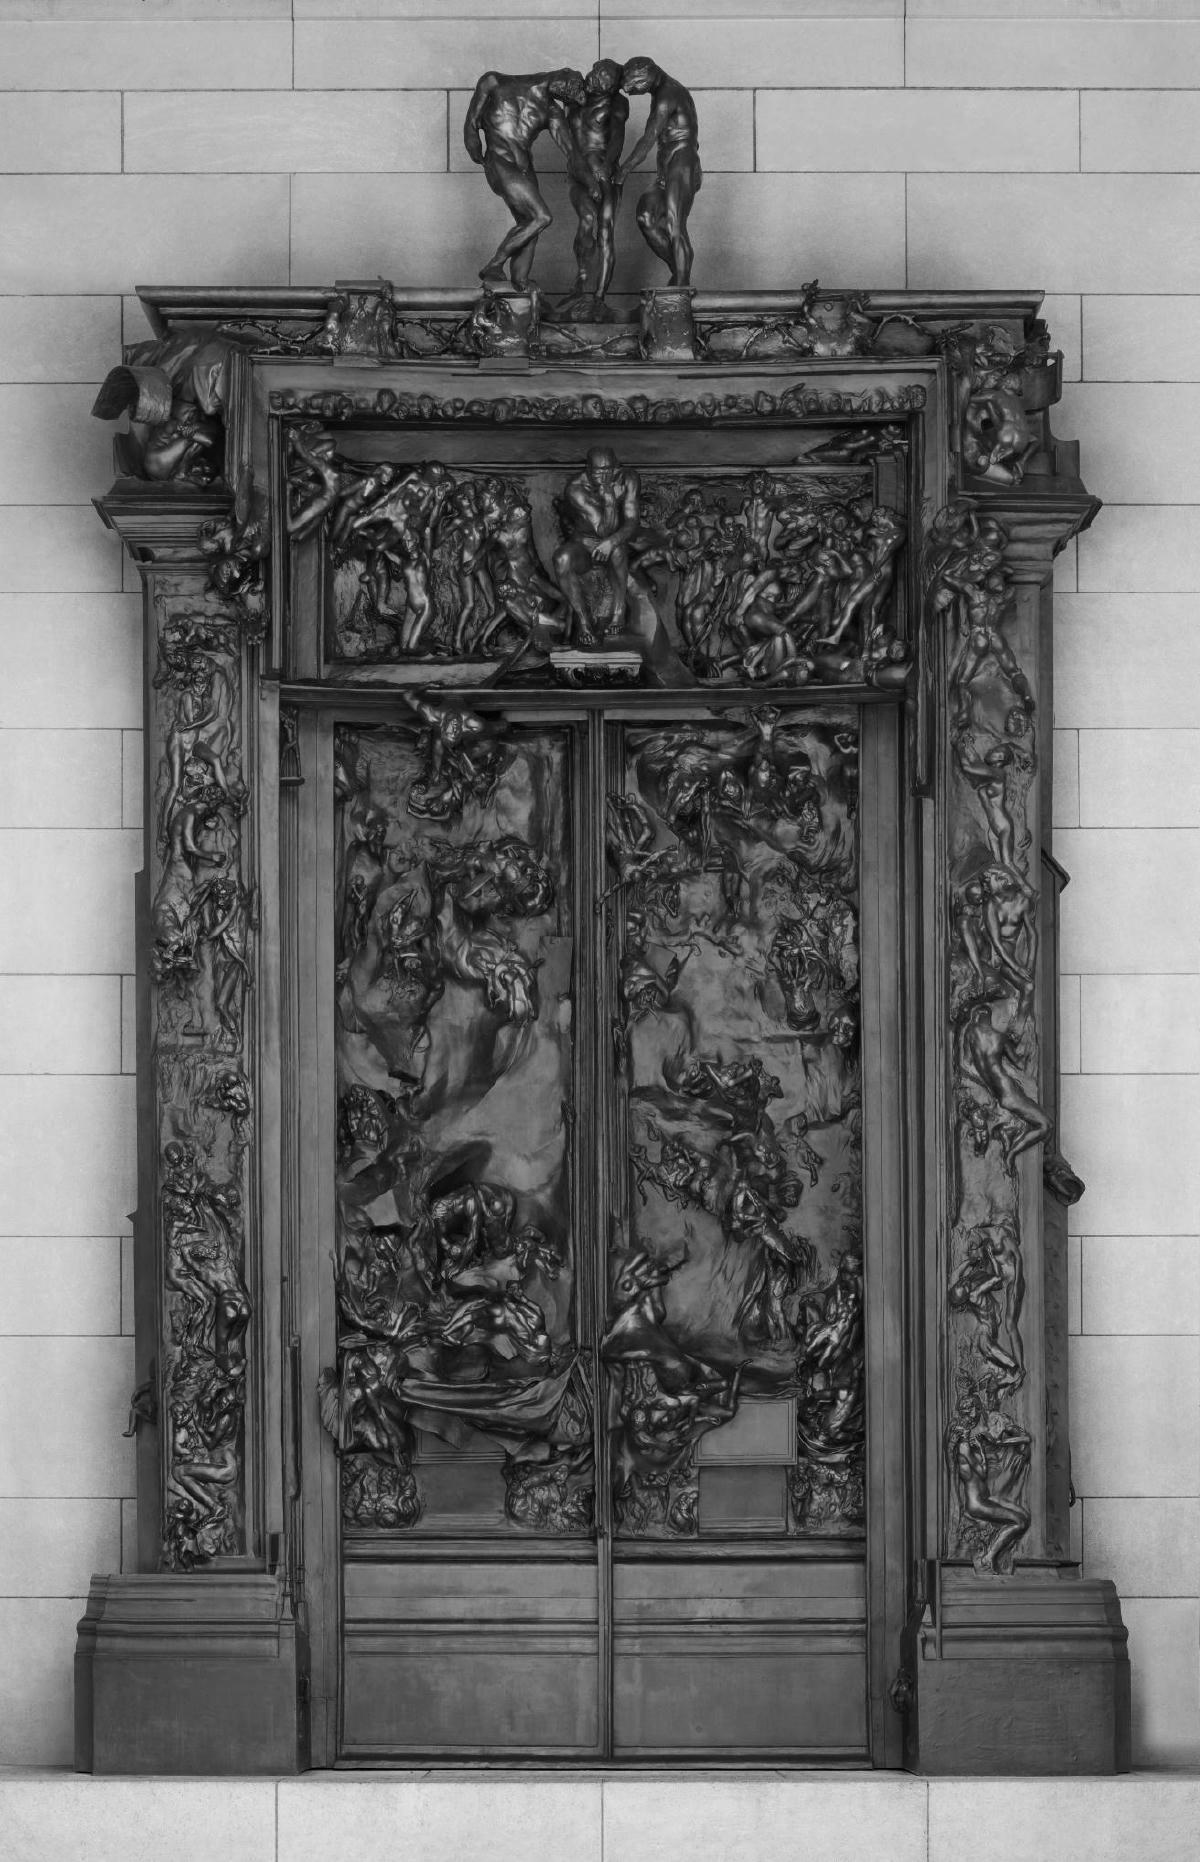

In [11]:
gray = utils.get_grayscale(original)
utils.display(gray)

  0%|          | 0/1862 [00:00<?, ?it/s]

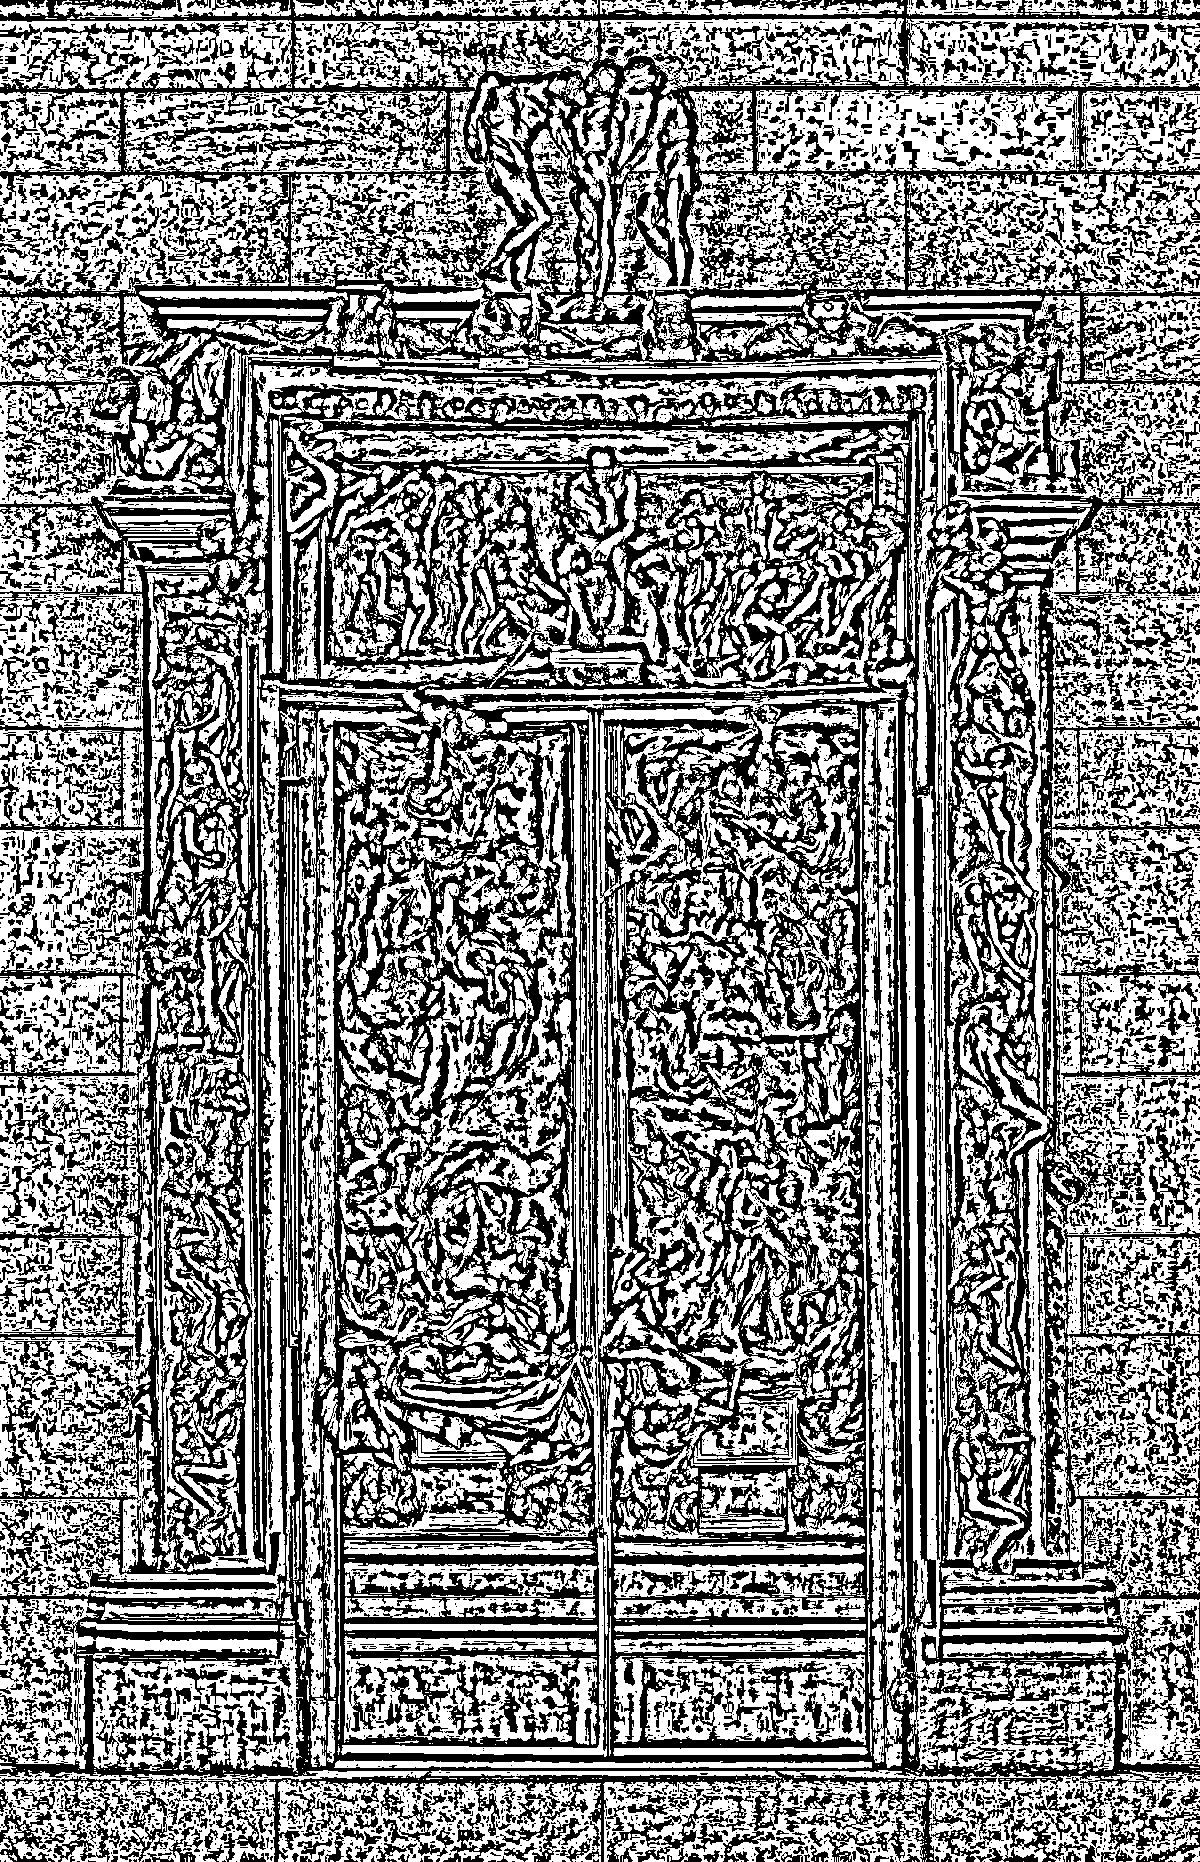

In [12]:
median_bw = utils.adaptive_median_thresholding(gray, radius=9)
utils.display(median_bw)

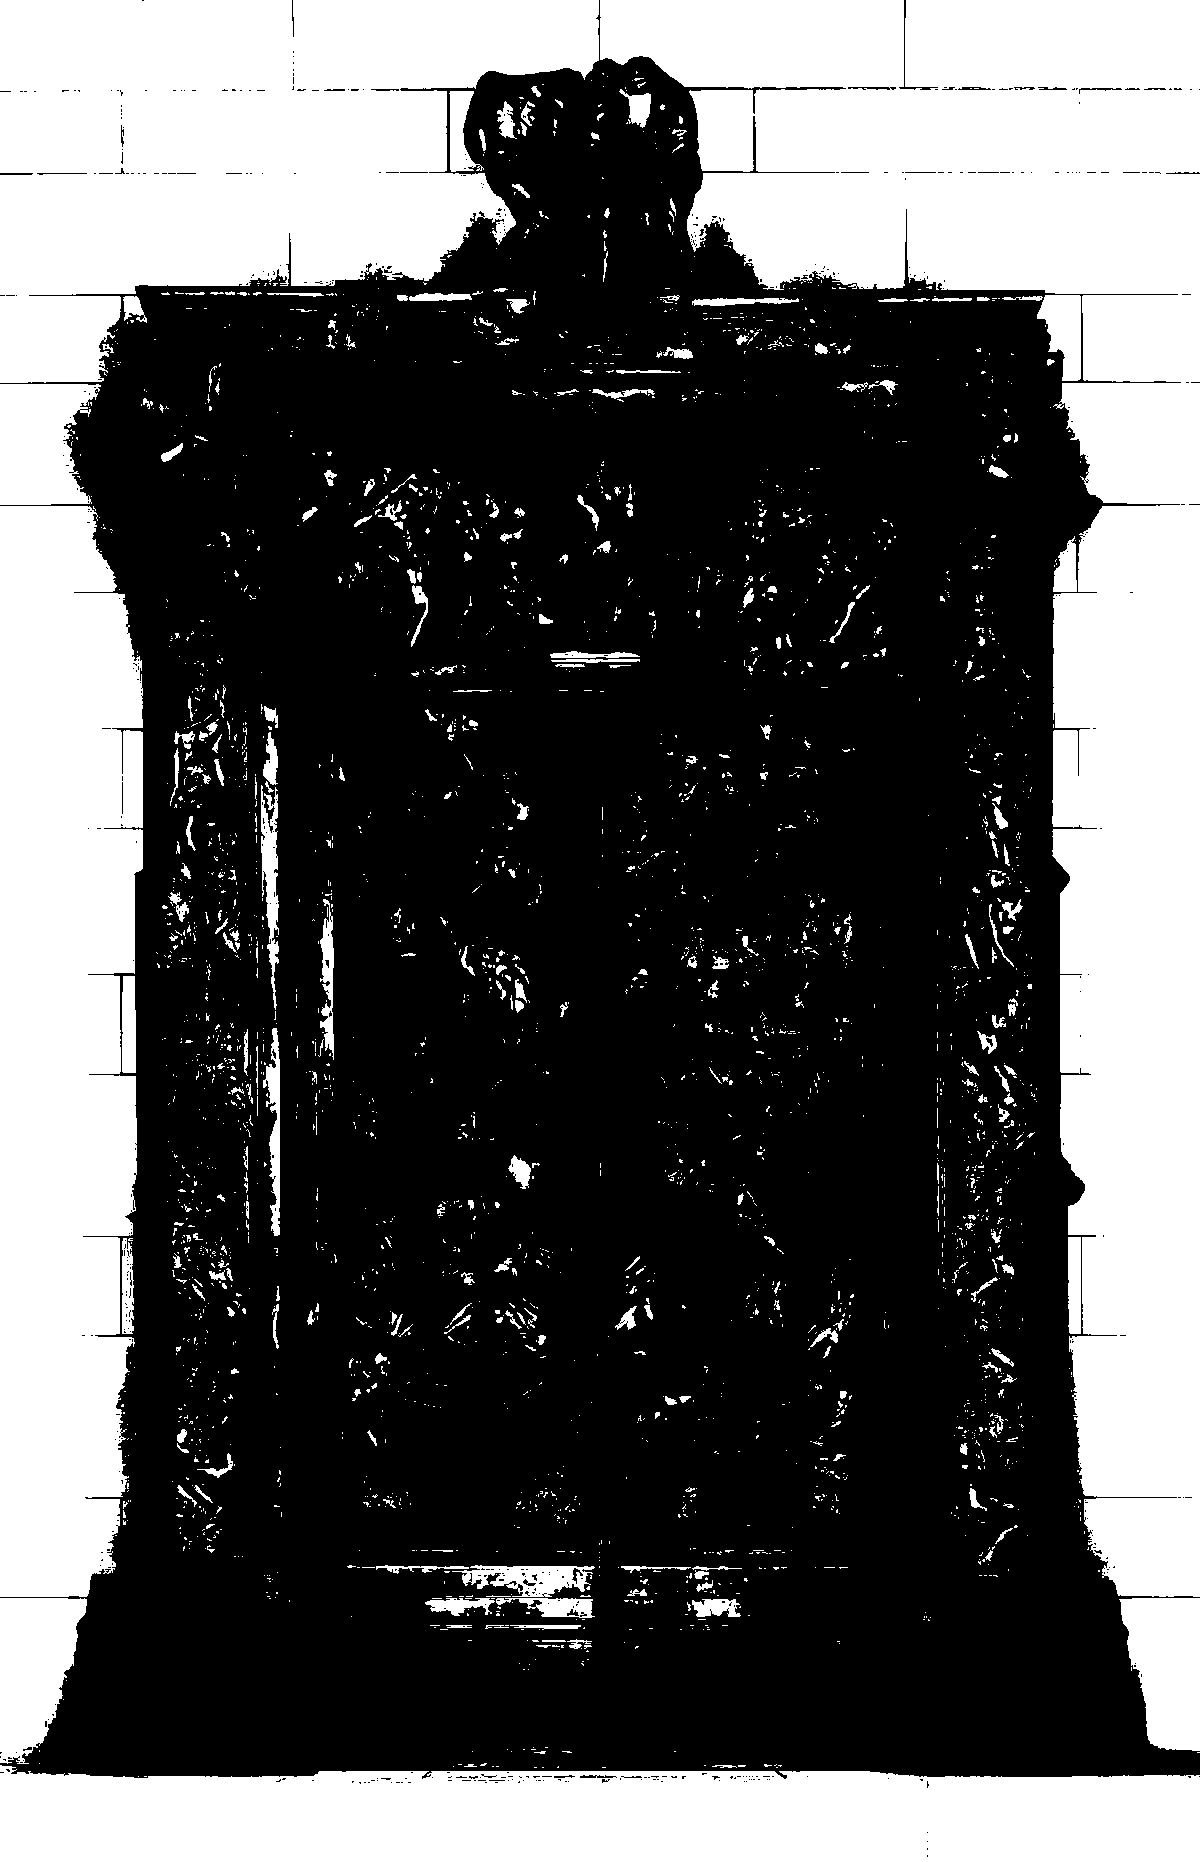

In [13]:
global_otsu_threshold, _ = utils.get_global_otsu_threshold(gray)
background_mask = gray >= global_otsu_threshold
bw1 = np.zeros_like(gray)
bw1[background_mask] = WHITE
utils.display(bw1)

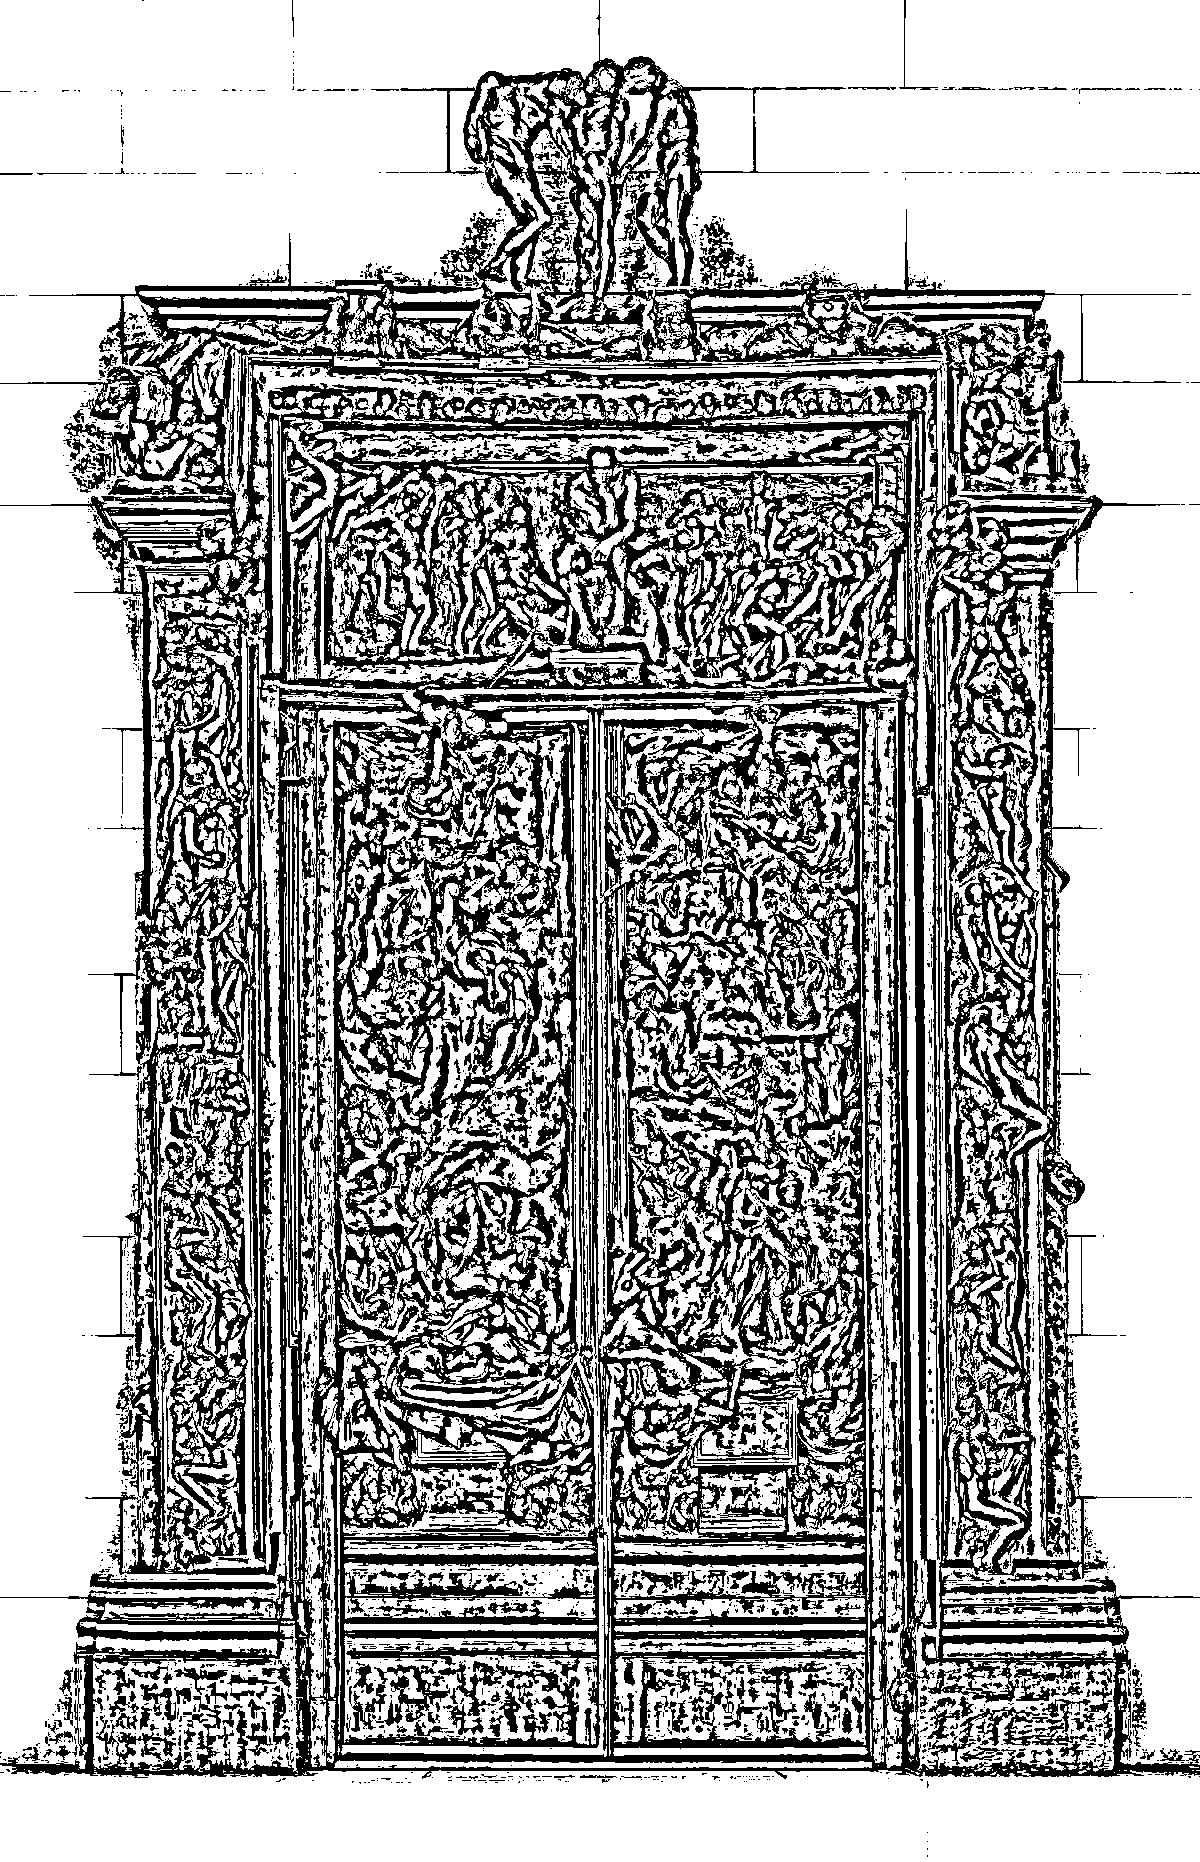

In [14]:
bw2 = bw1.copy()
for i, row in enumerate(bw1):
    for j, pixel in enumerate(row):
        if pixel == BLACK:
            bw2[i, j] = median_bw[i, j]
utils.display(bw2)

  0%|          | 0/1496295 [00:00<?, ?it/s]

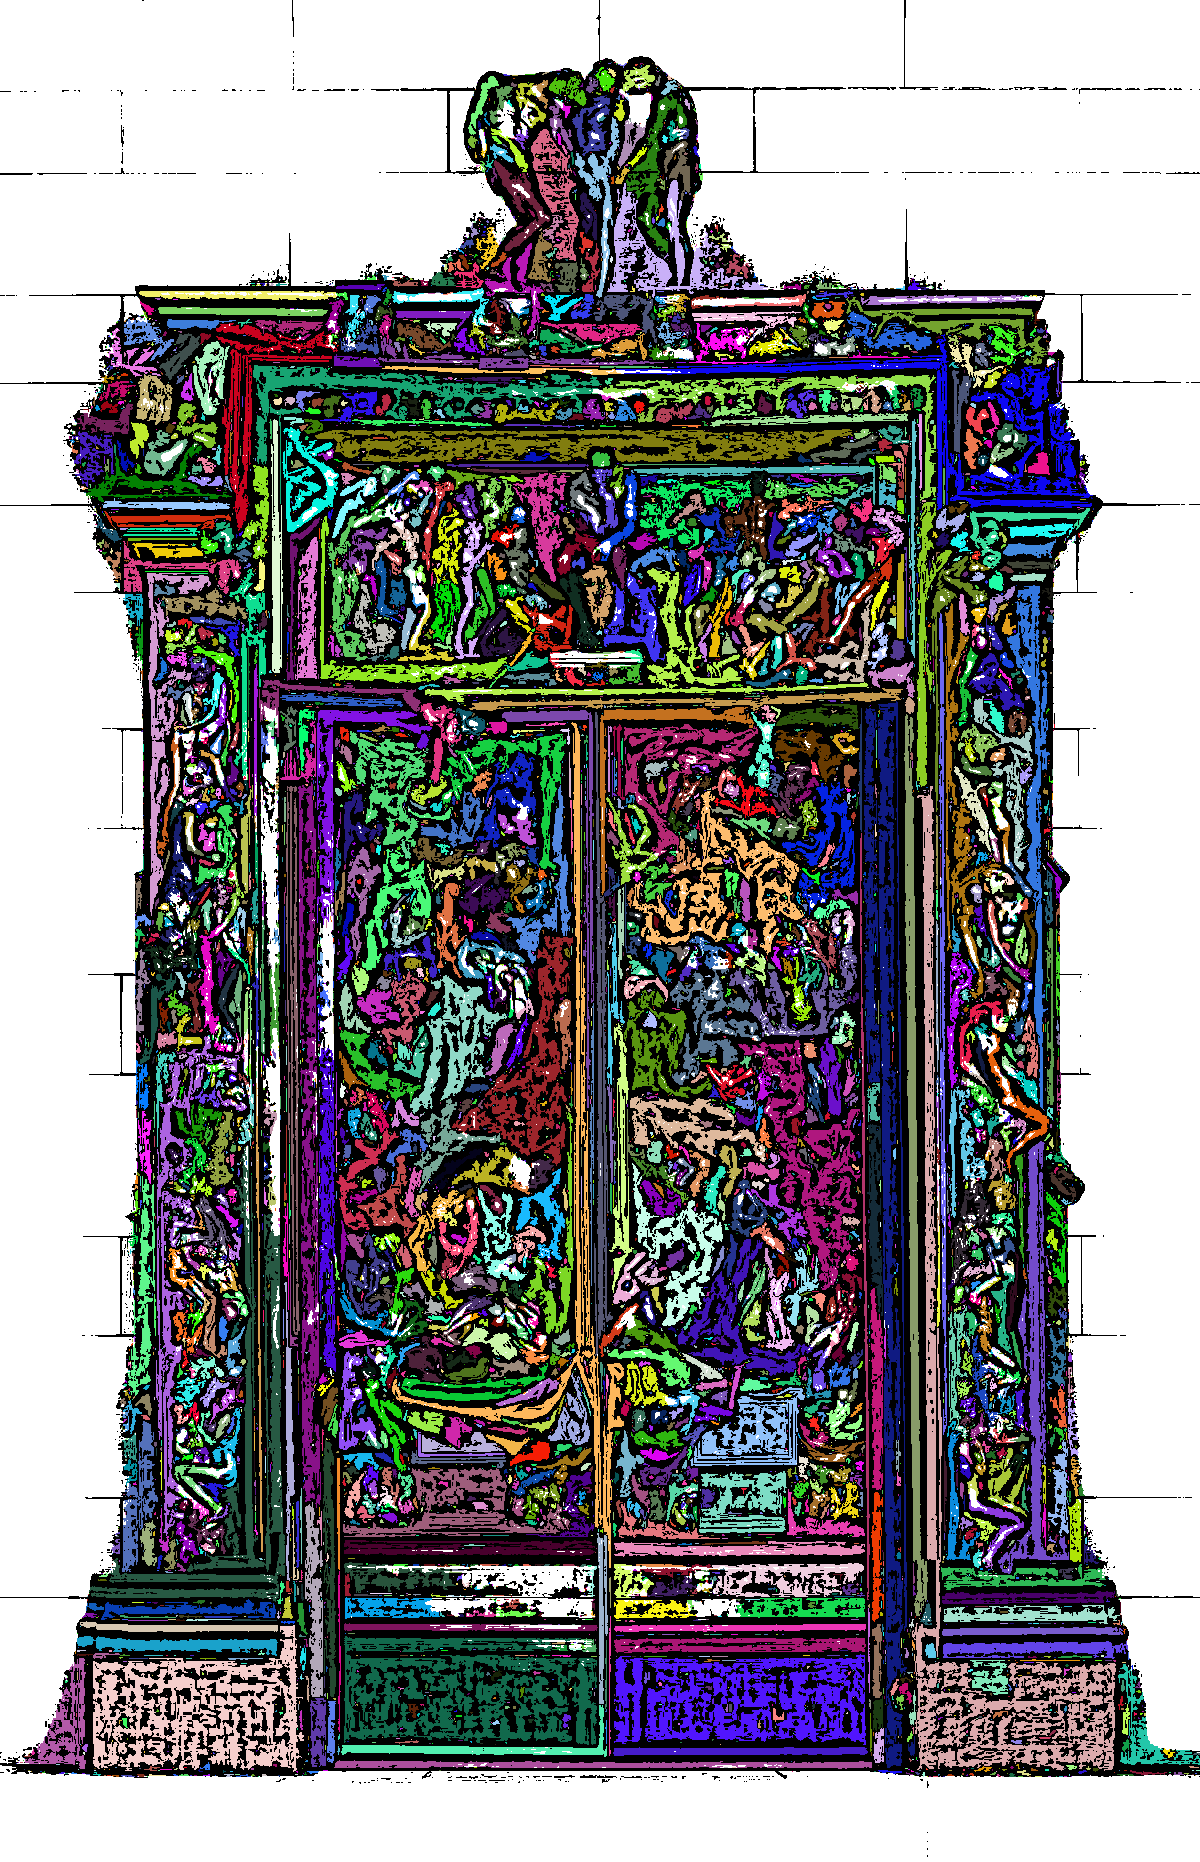

In [15]:
colored = utils.fillcolor(bw2, background_mask)
utils.display(colored)

  0%|          | 0/1862 [00:00<?, ?it/s]

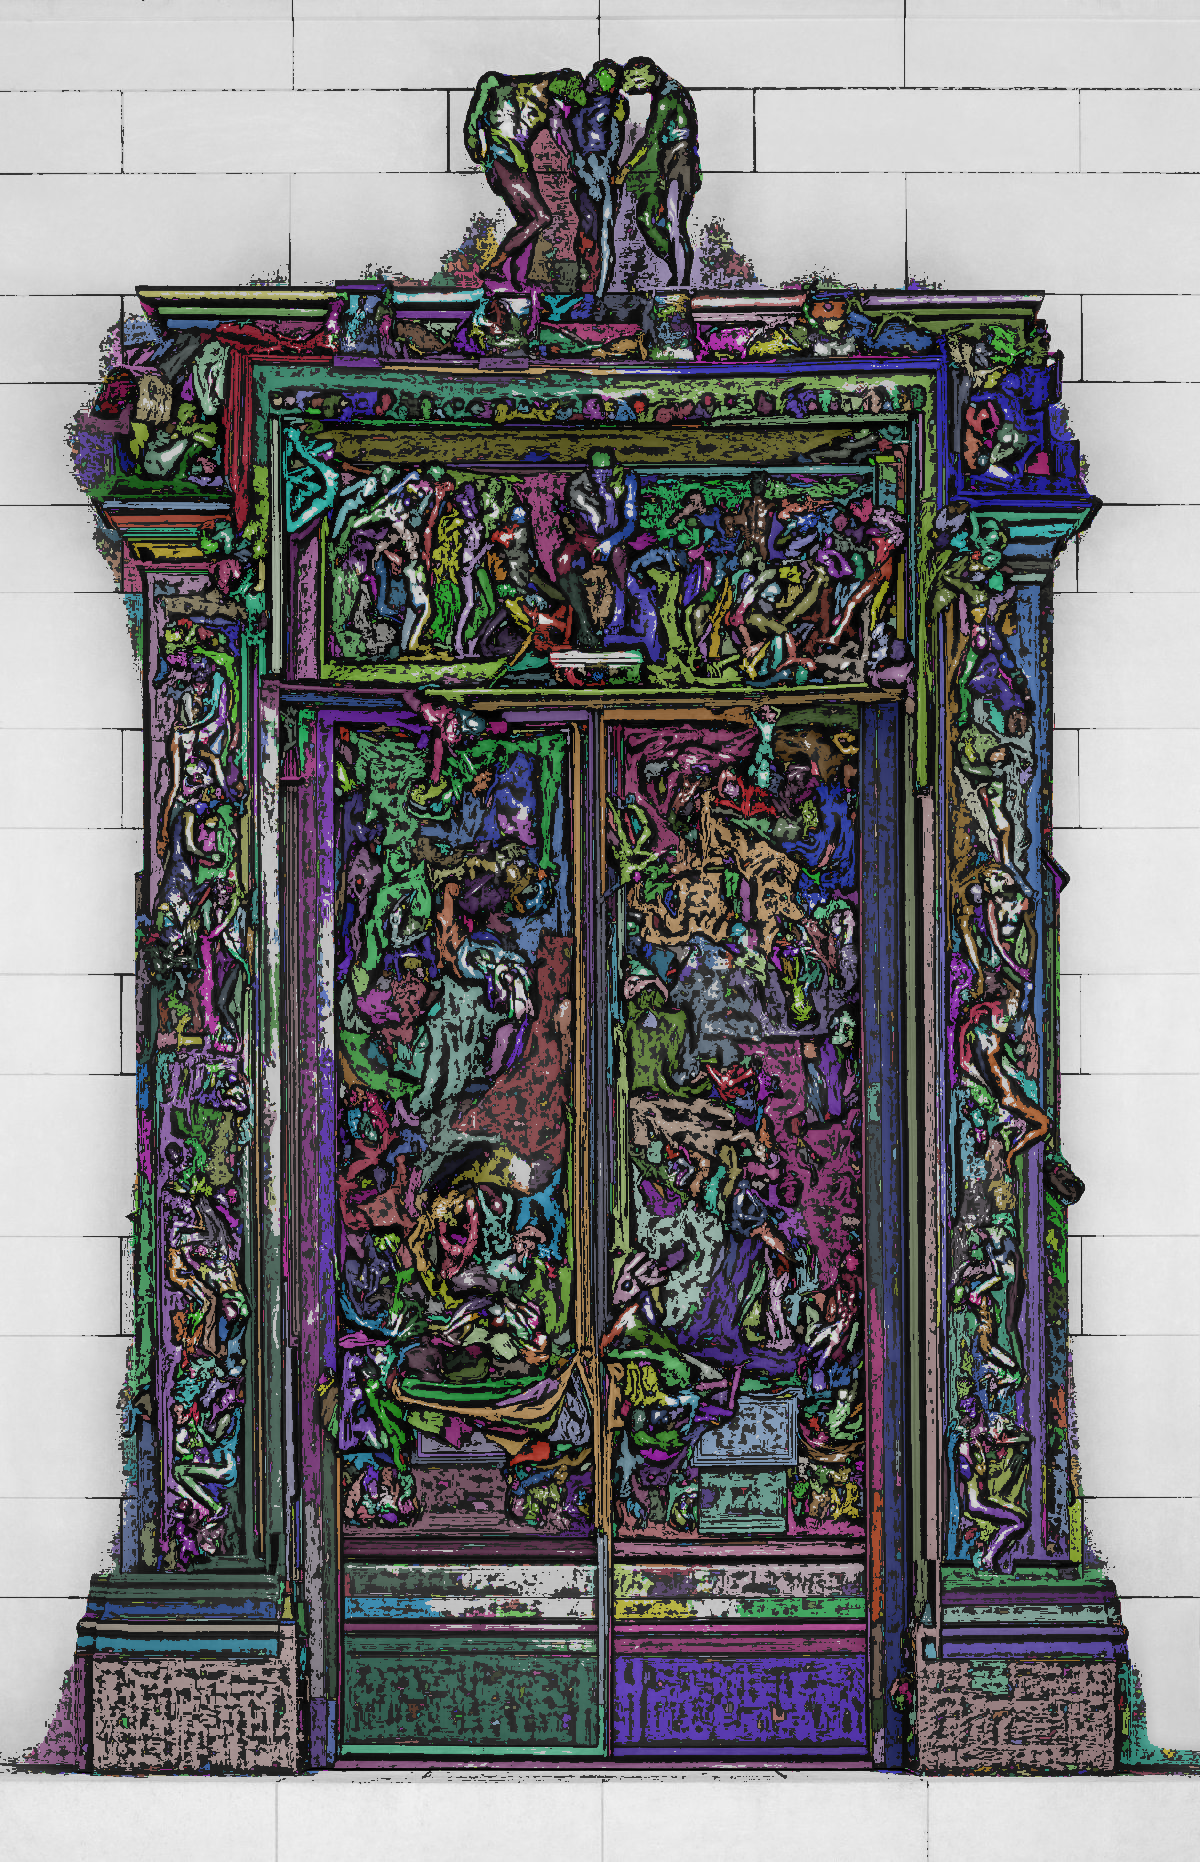

In [16]:
color_adjusted = colored.copy() / 4
intensity = np.repeat(gray, 3).reshape(original.shape).astype(int)
intensity = intensity
for i, row in enumerate(tqdm(colored)):
    for j, pixel in enumerate(row):
        color_adjusted[i, j] = np.mean(np.array([ pixel, intensity[i, j] ]), axis=0)
utils.display(color_adjusted)